In [14]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [17]:
data_df =pd.read_csv("./AB_NYC_2019.csv")

In [18]:
data_df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [19]:
print("Number of Raw Datapoints", len(data_df))

Number of Raw Datapoints 48895


In [20]:
data_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [22]:
data_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [23]:
data_df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [24]:
data_df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [25]:
data_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [26]:
data_df['last_review']

0        2018-10-19
1        2019-05-21
2               NaN
3        2019-07-05
4        2018-11-19
            ...    
48890           NaN
48891           NaN
48892           NaN
48893           NaN
48894           NaN
Name: last_review, Length: 48895, dtype: object

In [28]:
data_df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [29]:
data_df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [31]:
plt.rcParams.update({'font.size': 22})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


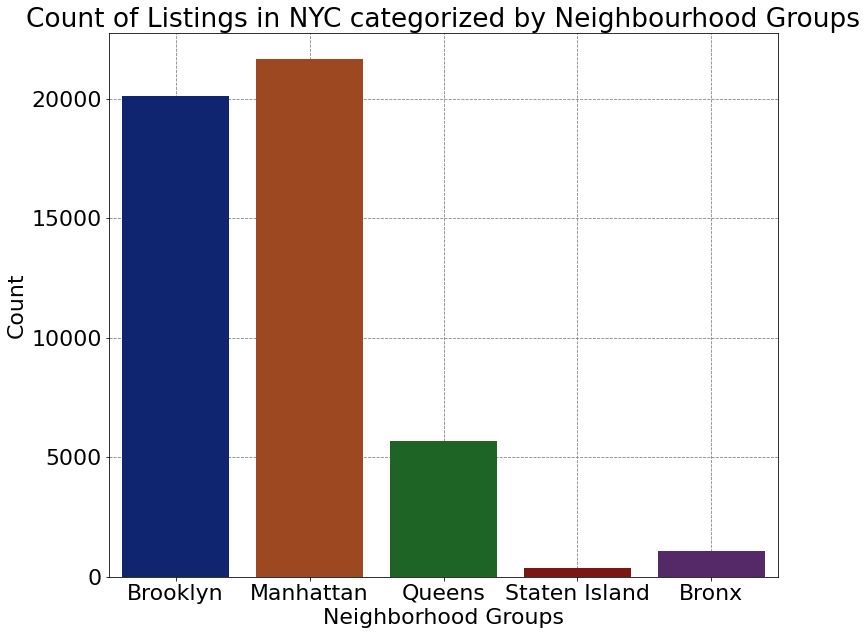

In [36]:
plt.figure(figsize=(12,10))
ax = sns.countplot(data_df["neighbourhood_group"], palette='dark')

ax.set_title('Count of Listings in NYC categorized by Neighbourhood Groups')
ax.set_ylabel('Count')
ax.set_xlabel('Neighborhood Groups')
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
# plt.savefig("Count_neighborhood.pdf", format="pdf", bbox_inches="tight")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


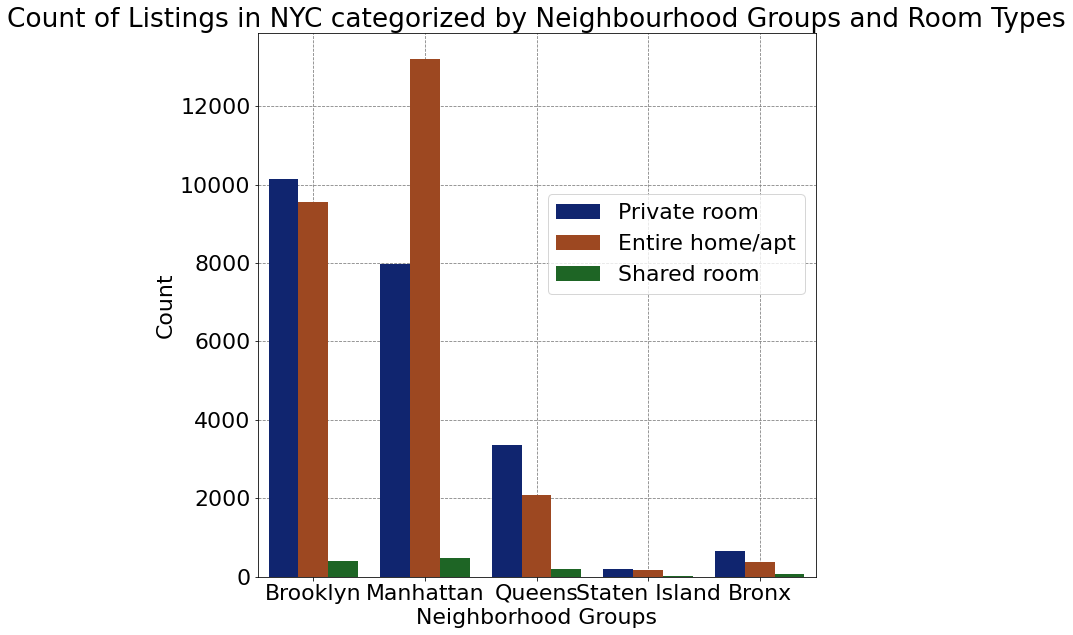

In [37]:
plt.figure(figsize=(10,10))
ax = sns.countplot(data_df['neighbourhood_group'],hue=data_df['room_type'], palette='dark')
ax.set_title('Count of Listings in NYC categorized by Neighbourhood Groups and Room Types')
ax.set_ylabel('Count')
ax.set_xlabel('Neighborhood Groups')
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
ax.legend(loc = 4, bbox_to_anchor=(1.0,0.5))
# plt.savefig("Count_neighborhood_room_type.pdf", format="pdf", bbox_inches="tight")

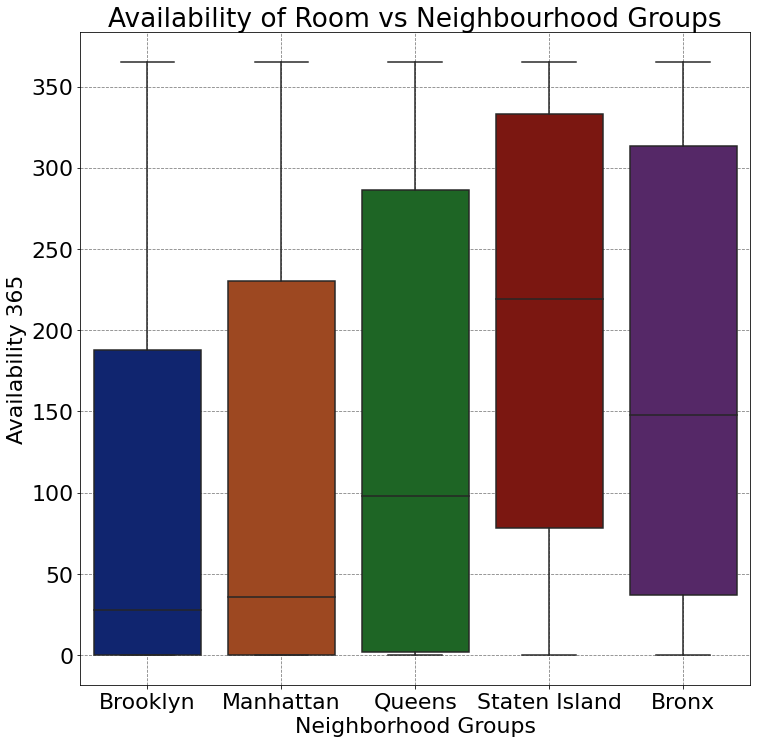

In [40]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(data=data_df, x='neighbourhood_group',y='availability_365',palette='dark')
ax.set_title('Availability of Room vs Neighbourhood Groups')
ax.set_ylabel('Availability 365')
ax.set_xlabel('Neighborhood Groups')
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
# plt.savefig("availability_neighborhood_room_type_boxplot.pdf", format="pdf", bbox_inches="tight")

In [41]:
data_df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [42]:
data_df.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

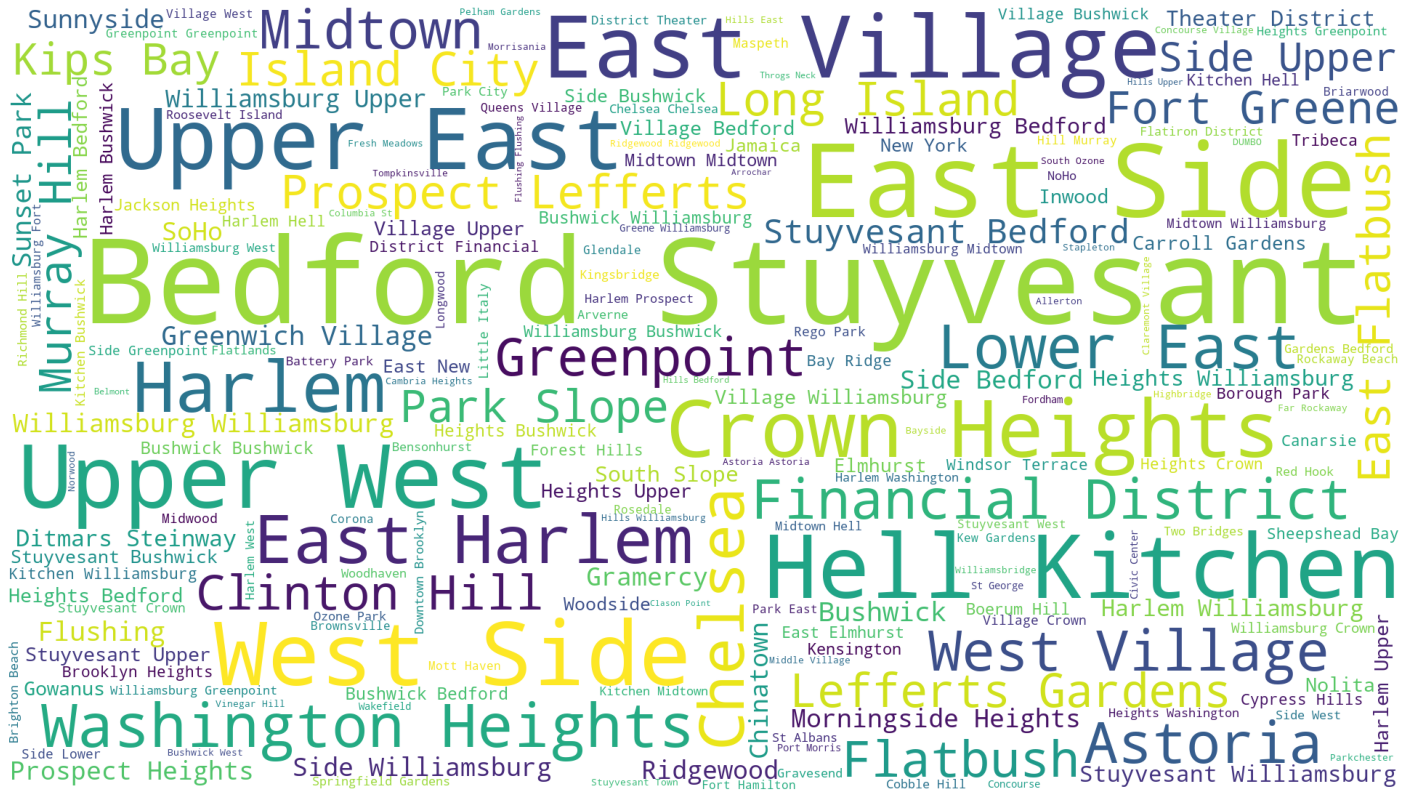

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
neighborhood_wordcloud = WordCloud(background_color='white', width=1920, height=1080).generate(" ".join(data_df.neighbourhood))
plt.imshow(neighborhood_wordcloud)
plt.axis('off')
# plt.savefig("neighbourhood_wordcloud.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [44]:
data_df.host_id.value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

In [45]:
data_df.host_name.value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [46]:
data_df.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [47]:
hosts_max_list = data_df.host_id.value_counts().head(10)
hosts_max_list

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [48]:
hosts_max_df = pd.DataFrame(hosts_max_list)
hosts_max_df.reset_index(inplace=True)
hosts_max_df.rename(columns={'index':'Host_ID', 'host_id':'Count_Listings'}, inplace=True)
hosts_max_df

Host_ID  Count_Listings
0  219517861             327
1  107434423             232
2   30283594             121
3  137358866             103
4   16098958              96
5   12243051              96
6   61391963              91
7   22541573              87
8  200380610              65
9    7503643              52

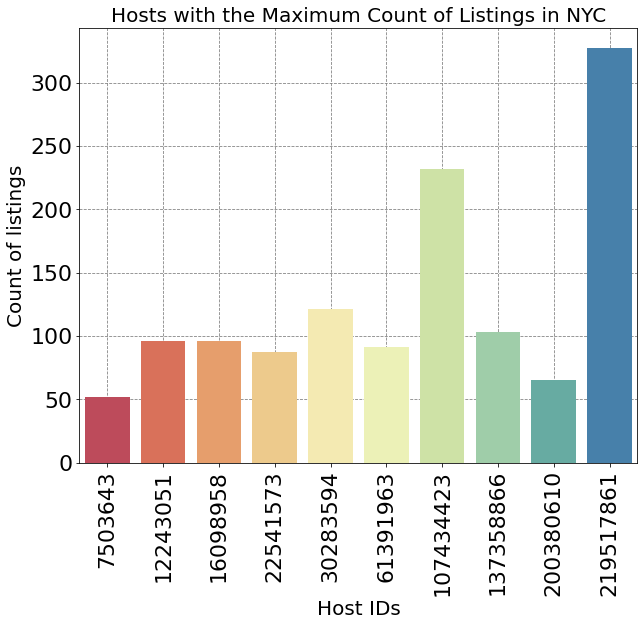

In [49]:
plt.figure(figsize=(10,8))
hosts_viz=sns.barplot(x="Host_ID", y="Count_Listings", data=hosts_max_df,
                 palette='Spectral')
hosts_viz.set_title('Hosts with the Maximum Count of Listings in NYC', fontsize=20)
hosts_viz.set_ylabel('Count of listings', fontsize=20)
hosts_viz.set_xlabel('Host IDs', fontsize=20)
hosts_viz.set_xticklabels(hosts_viz.get_xticklabels(), rotation=90)
hosts_viz.set_axisbelow(True)
hosts_viz.grid(color='gray', linestyle='dashed')
# plt.savefig("host_max_count_listing.pdf", format="pdf", bbox_inches="tight")

In [51]:
sub_1=data_df.loc[data_df['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]

sub_2=data_df.loc[data_df['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]

sub_3=data_df.loc[data_df['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]

sub_4=data_df.loc[data_df['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]

sub_5=data_df.loc[data_df['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]

price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [52]:
price_neighborhood_group_dist = []

neighbourhood_group_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    price_neighborhood_group_dist.append(i)
 
price_neighborhood_group_dist[0].rename(columns={'price':neighbourhood_group_list[0]}, inplace=True)
price_neighborhood_group_dist[1].rename(columns={'price':neighbourhood_group_list[1]}, inplace=True)
price_neighborhood_group_dist[2].rename(columns={'price':neighbourhood_group_list[2]}, inplace=True)
price_neighborhood_group_dist[3].rename(columns={'price':neighbourhood_group_list[3]}, inplace=True)
price_neighborhood_group_dist[4].rename(columns={'price':neighbourhood_group_list[4]}, inplace=True)

stat_df=price_neighborhood_group_dist
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

Brooklyn  Manhattan   Queens  Staten Island   Bronx
Stats                                                     
min         0.0        0.0     10.0           13.0     0.0
25%        60.0       95.0     50.0           50.0    45.0
50%        90.0      150.0     75.0           75.0    65.0
75%       150.0      220.0    110.0          110.0    99.0
max     10000.0    10000.0  10000.0         5000.0  2500.0

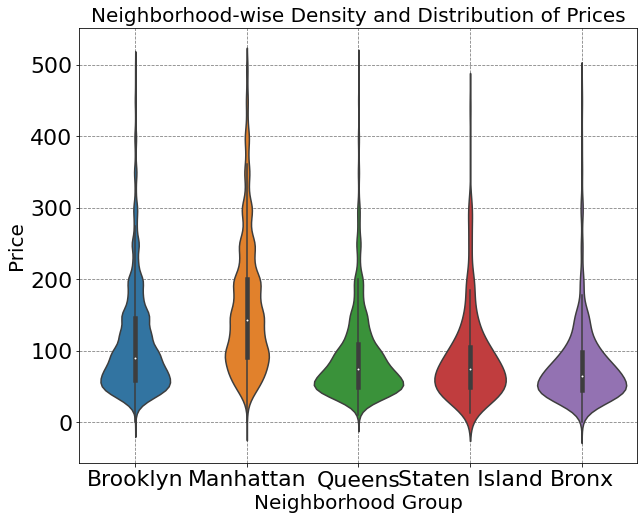

In [53]:
plt.figure(figsize=(10,8))

sub_6=data_df[data_df.price < 500]


neighbourhood_grp_viz = sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
neighbourhood_grp_viz.set_ylabel('Price', fontsize=20)
neighbourhood_grp_viz.set_xlabel('Neighborhood Group', fontsize=20)
neighbourhood_grp_viz.set_title('Neighborhood-wise Density and Distribution of Prices', fontsize=20)
neighbourhood_grp_viz.set_axisbelow(True)
neighbourhood_grp_viz.grid(color='gray', linestyle='dashed')
# plt.savefig("neighborhood_group_violin_plot.pdf", format="pdf", bbox_inches="tight")

### Analysis of Top-10 Neighborhoods

In [54]:
data_df.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

Text(0.5, 0.98, 'Visualization of Listings by Neighbourhood and Neighbourhood Groups')

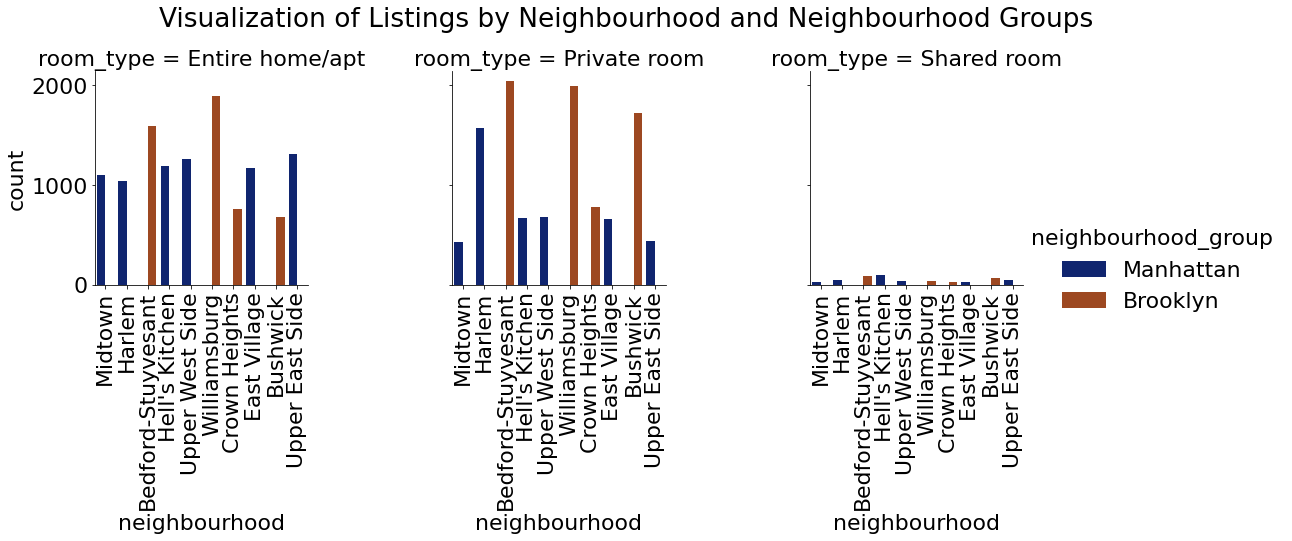

In [56]:
sub_7=data_df.loc[data_df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]

neighbourhood_t10_viz = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count', palette='dark')
neighbourhood_t10_viz.set_xticklabels(rotation=90)
neighbourhood_t10_viz.fig.subplots_adjust(top=0.8)
neighbourhood_t10_viz.fig.suptitle('Visualization of Listings by Neighbourhood and Neighbourhood Groups')
# plt.savefig("neighborhood_neighborhood_group_count.pdf", format="pdf", bbox_inches="tight")

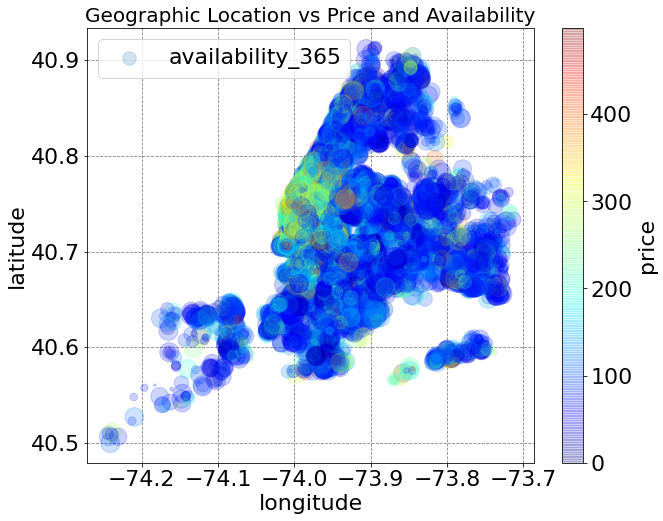

In [57]:
ax=plt.gca()
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
location_availability_viz = sub_6.plot(kind='scatter', x='longitude', y='latitude', label = 'availability_365', s='availability_365', c='price', ax = ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.2, figsize=(10,8))
location_availability_viz.set_title('Geographic Location vs Price and Availability', fontsize=20)

location_availability_viz.set_axisbelow(True)
location_availability_viz.grid(color='gray', linestyle='dashed')
# plt.savefig("geographic_location_availability.pdf", format="pdf", bbox_inches="tight")

Text(0.5, 1.0, 'Location (NY) vs Price')

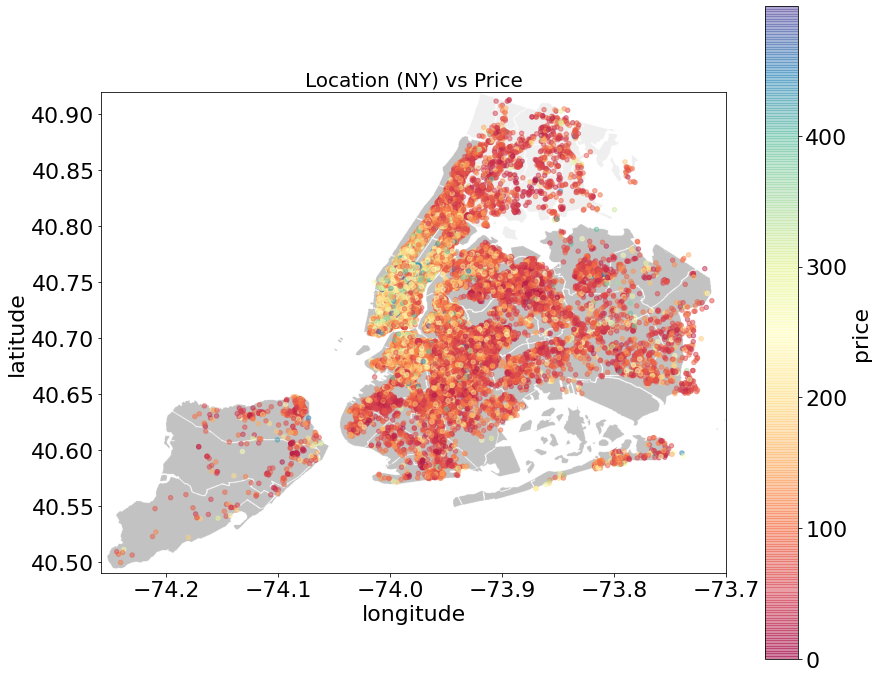

In [60]:
import urllib
from PIL import Image
from PIL import ImageEnhance

plt.figure(figsize=(14,12))
fname = r'./New_York_City_.png'
nyc_img = Image.open(fname).convert("L")
enhancer = ImageEnhance.Brightness(nyc_img)
factor = 1.5
im_output = enhancer.enhance(factor)
plt.imshow(im_output,zorder=0,extent=[-74.258, -73.7, 40.49,40.92], cmap='Greys_r')
ax=plt.gca()
location_availability_viz_map = sub_6.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax, 
           cmap=plt.get_cmap('Spectral'), colorbar=True, alpha=0.5, zorder=5)
location_availability_viz_map.set_title('Location (NY) vs Price', fontsize=20)

# plt.savefig("geographic_location_price_ny.pdf", format="pdf", bbox_inches="tight")


Text(0.5, 1.0, 'Geographic Location (NY) vs Availability')

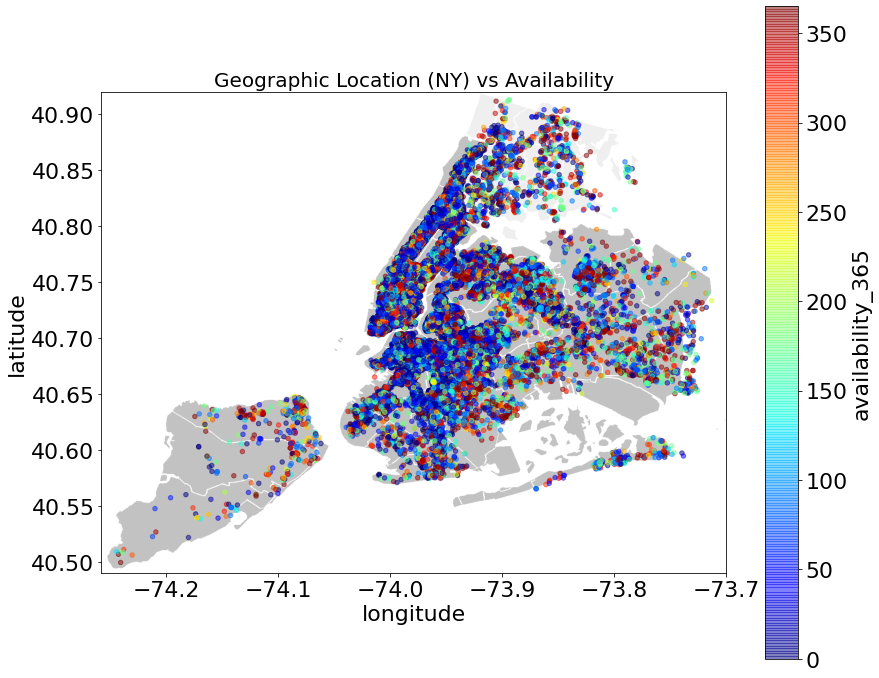

In [62]:
import urllib
plt.figure(figsize=(14,12))
fname = r'./New_York_City_.png'
nyc_img = Image.open(fname).convert("L")
enhancer = ImageEnhance.Brightness(nyc_img)
factor = 1.5
im_output = enhancer.enhance(factor)
plt.imshow(im_output,zorder=0,extent=[-74.258, -73.7, 40.49,40.92], cmap='Greys_r')

ax=plt.gca()
location_availability_viz_map = sub_6.plot(kind='scatter', x='longitude', y='latitude', c='availability_365', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.5, zorder=5)
location_availability_viz_map.set_title('Geographic Location (NY) vs Availability', fontsize=20)
# plt.savefig("geographic_location_availability_ny.pdf", format="pdf", bbox_inches="tight")


[Text(0, 0, 'in'),
 Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'the'),
 Text(0, 0, 'to'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'spacious'),
 Text(0, 0, '1'),
 Text(0, 0, 'with'),
 Text(0, 0, '2'),
 Text(0, 0, 'of'),
 Text(0, 0, 'east'),
 Text(0, 0, 'and'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '&'),
 Text(0, 0, 'park'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'williamsburg')]

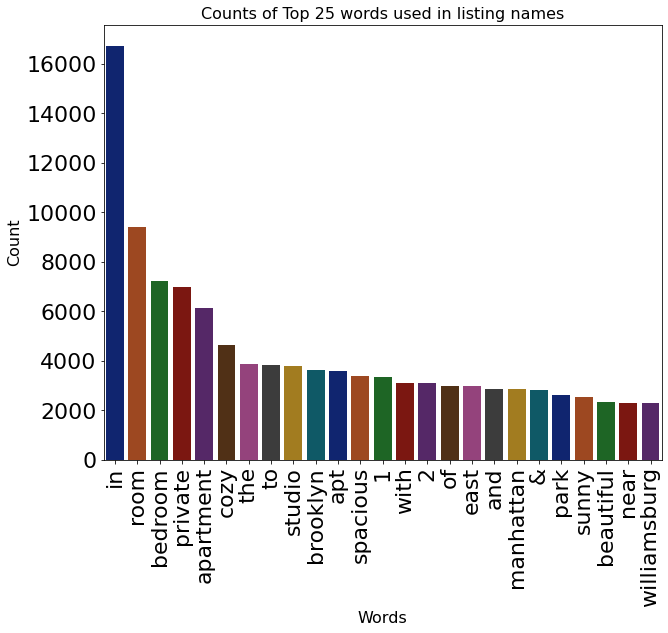

In [63]:
_names_=[]
for name in data_df.name:
    _names_.append(name)

def split_name(name):
    spl=str(name).split()
    return spl

_names_for_count_=[]

for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

from collections import Counter
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]

sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

plt.figure(figsize=(10,8))
viz_5=sns.barplot(x='Words', y='Count', data=sub_w, palette = 'dark')
viz_5.set_title('Counts of Top 25 words used in listing names', fontsize=16)
viz_5.set_ylabel('Count', fontsize=16)
viz_5.set_xlabel('Words', fontsize=16)
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=90)

# plt.savefig("listing_words_top_25.pdf", format="pdf", bbox_inches="tight")

In [64]:
data_df['host_listings_count'] = data_df.groupby('host_id')['host_id'].transform('count')

In [65]:
data_df_corr = data_df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'host_listings_count', 'availability_365']].corr()

Text(0.5, 1.0, 'Correlations b/w Numerical Features')

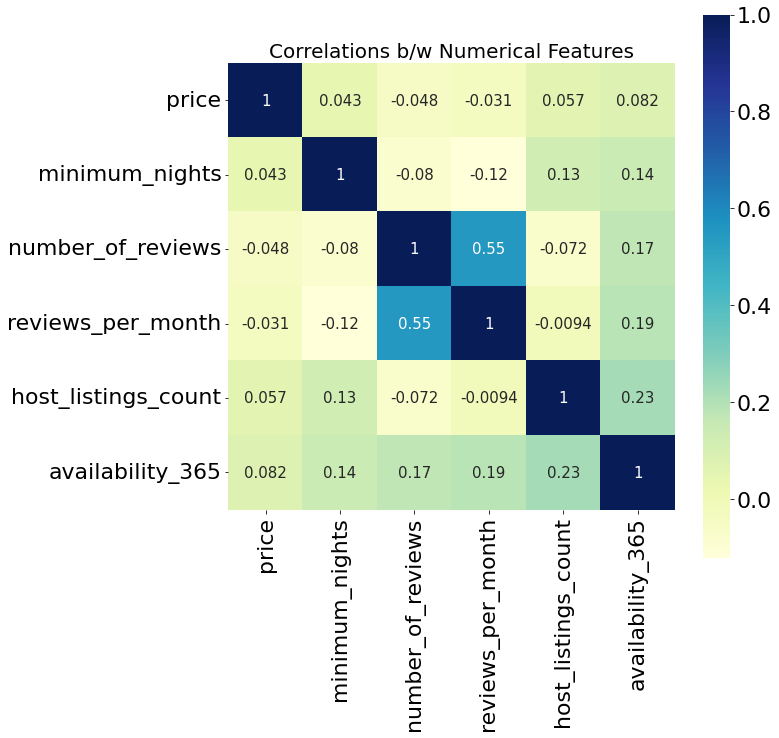

In [66]:
plt.figure(figsize=(10,10))
viz_corr = sns.heatmap(data_df_corr, annot = True, annot_kws = {'size': 15}, square = True, cmap = 'YlGnBu')
viz_corr.set_title('Correlations b/w Numerical Features', fontsize=20)
# plt.savefig("correlation_num_features.pdf", format="pdf", bbox_inches="tight")

Text(0.5, 1.0, 'Geographic Location (NY) vs Room Type Availability')

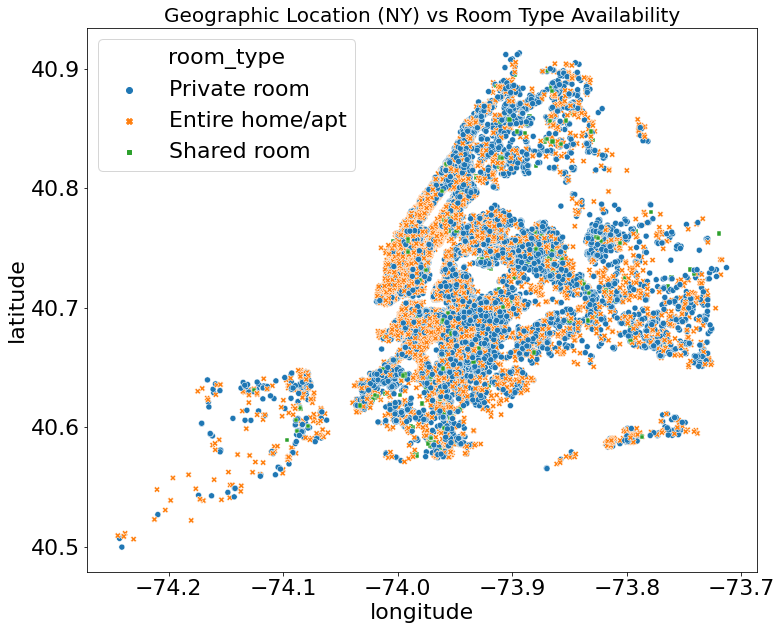

In [67]:
plt.figure(figsize = (12, 10))
room_type_loc = sns.scatterplot(x = 'longitude', y = 'latitude', data = data_df, hue = 'room_type', style = 'room_type')
room_type_loc.set_title('Geographic Location (NY) vs Room Type Availability', fontsize=20)
# plt.savefig("location_room_type_map.pdf", format="pdf", bbox_inches="tight")

Text(0.5, 1.0, 'Geographic Location (NY) and Neighborhood Groups')

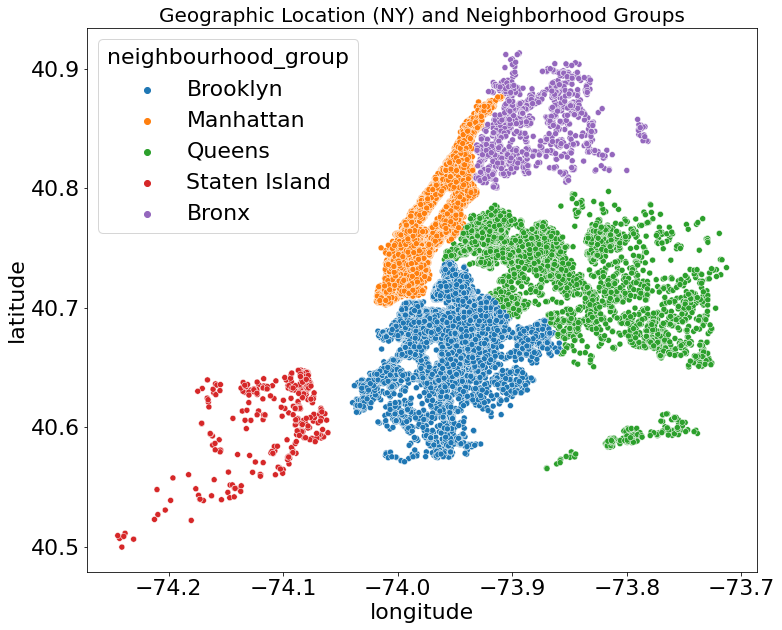

In [68]:
plt.figure(figsize=(12,10))
neigh_group_loc = sns.scatterplot(x=data_df.longitude,y=data_df.latitude,hue=data_df.neighbourhood_group)
neigh_group_loc.set_title('Geographic Location (NY) and Neighborhood Groups', fontsize=20)
# plt.savefig("location_neighborhood.pdf", format="pdf", bbox_inches="tight")

In [74]:
review_50 = data_df[data_df['number_of_reviews']>=50]
df2 = review_50['neighbourhood_group'].value_counts()

In [75]:
df3 = pd.DataFrame(df2)

In [77]:
review_50 = data_df[data_df['number_of_reviews']>=50]
df2 = review_50['neighbourhood_group'].value_counts()

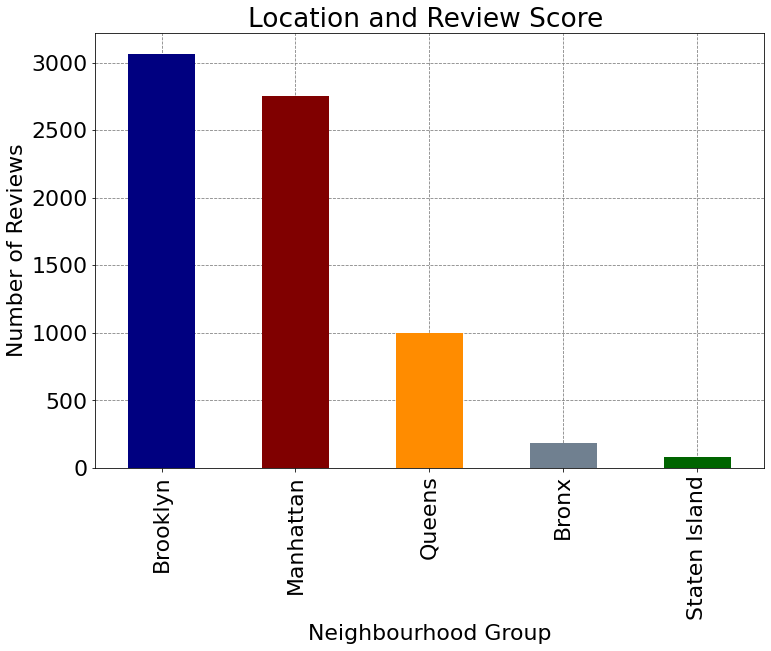

In [79]:
fig = plt.figure(figsize=(12,8))
review_50 = data_df[data_df['number_of_reviews']>=50]
df2 = review_50['neighbourhood_group'].value_counts()

df2.plot(kind='bar',color=['navy','maroon','darkorange','slategray','darkgreen'], zorder=3)
plt.title('Location and Review Score ')
plt.ylabel('Number of Reviews')
plt.xlabel('Neighbourhood Group')
plt.grid(color='gray', linestyle='dashed', zorder=0)
# plt.savefig("location_review_scores.pdf", format="pdf", bbox_inches="tight")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Histograms of Rental Prices')

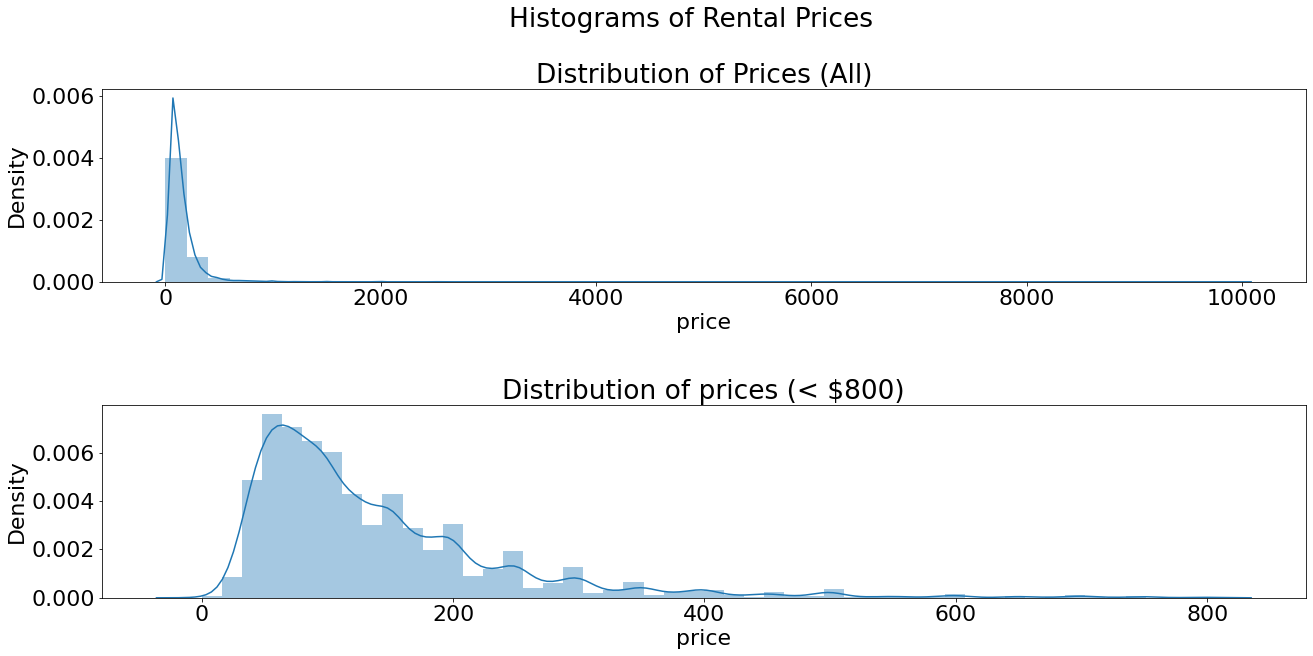

In [80]:
fig, ax= plt.subplots(2,1, figsize=(20,10))
fig.tight_layout(pad=4.0)
ax[0].set_title("Distribution of Prices (All)")
sns.distplot(data_df['price'], kde=True, ax=ax[0])
ax[1].set_title("Distribution of prices (< $800)")
sns.distplot(data_df[data_df['price'] < 800]['price'], kde=True, ax=ax[1])
fig.suptitle("Histograms of Rental Prices")
# plt.savefig("histogram_price_dist.pdf", format="pdf", bbox_inches="tight")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


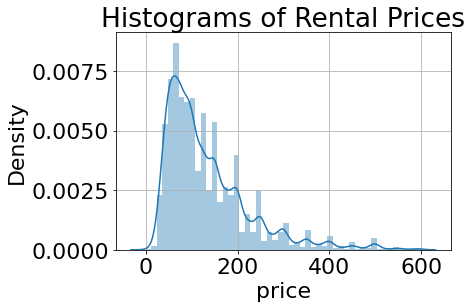

In [81]:
sns.distplot(data_df[data_df['price'] < 600]['price'], kde=True)
plt.title("Histograms of Rental Prices")
plt.grid()
# plt.savefig("histogram_price_dist_600.pdf", format="pdf", bbox_inches="tight")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Mean Price in each Neighbourhood Group')

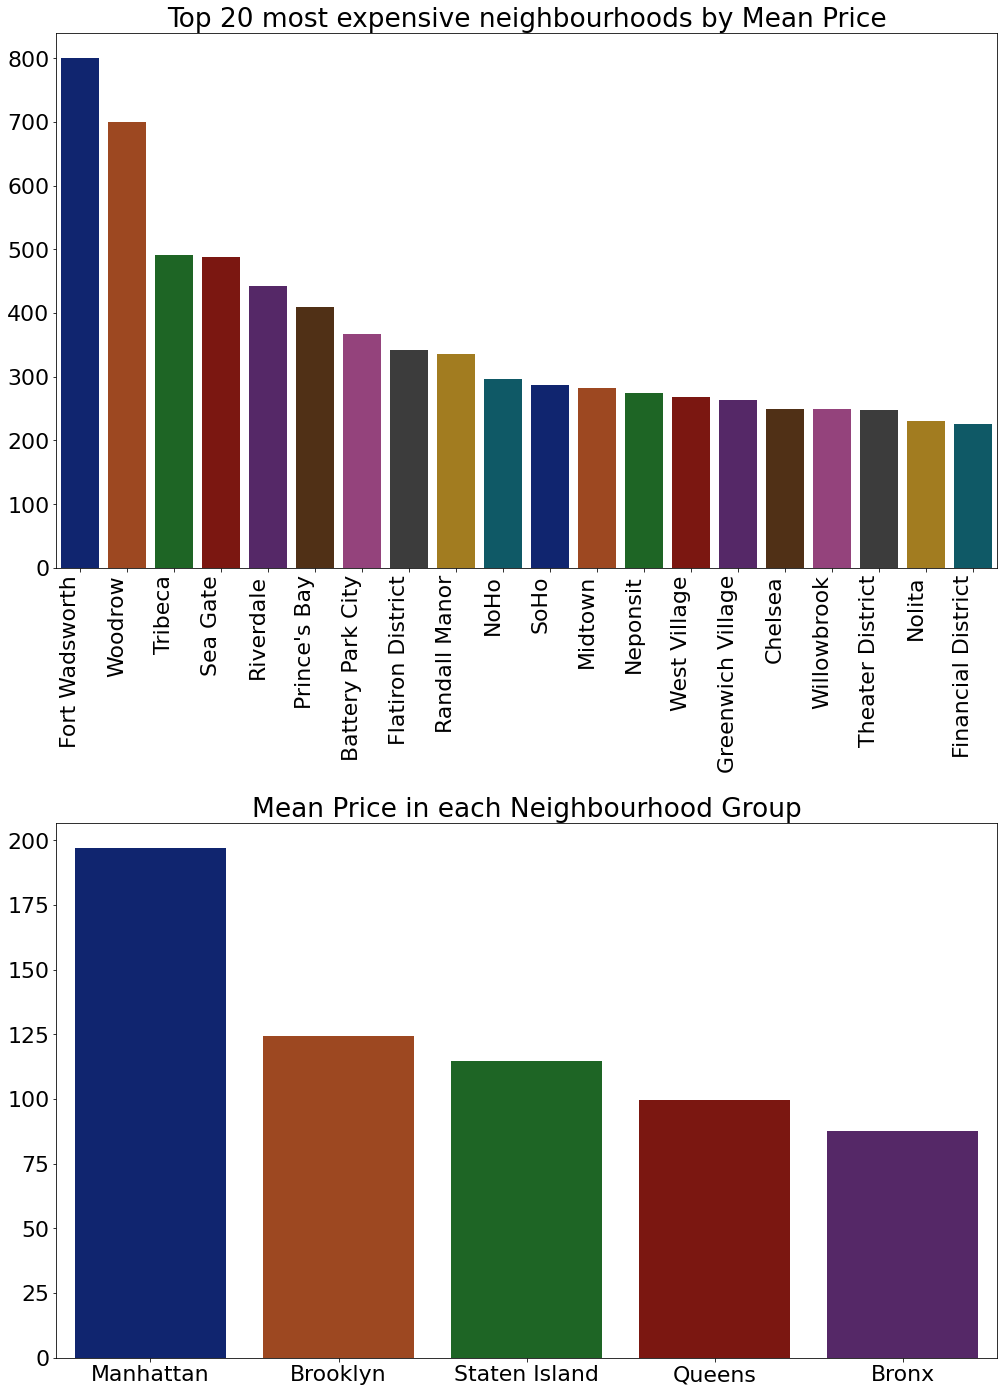

In [82]:
d = data_df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

fig, ax= plt.subplots(2,1, figsize=(20,25))
fig.tight_layout(pad=10.0)
sns.barplot(d.index.tolist()[:20], d.values[:20], ax=ax[0], palette=("dark"))
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, ha="right")
ax[0].set_title('Top 20 most expensive neighbourhoods by Mean Price')

d = data_df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)[:5]
sns.barplot(d.index.tolist(), d.values, ax=ax[1], palette=("dark"))
ax[1].set_title('Mean Price in each Neighbourhood Group')

# plt.savefig("aggregate_price.pdf", format="pdf", bbox_inches="tight")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


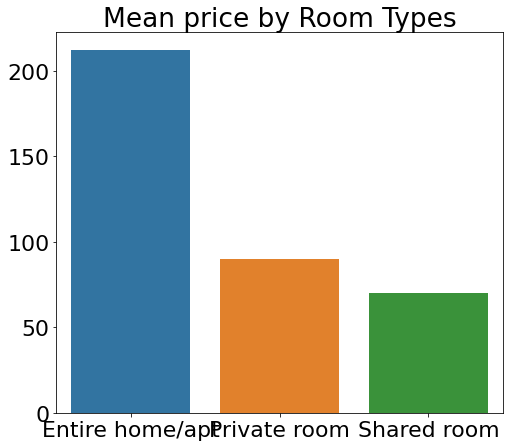

In [83]:
d = data_df.groupby('room_type')['price'].mean().sort_values(ascending=False)
fig, ax= plt.subplots(figsize=(8,7))
sns.barplot(d.index.tolist(), d.values, ax=ax)
ax.set_title('Mean price by Room Types')
plt.savefig("aggregate_price_room_type.pdf", format="pdf", bbox_inches="tight")

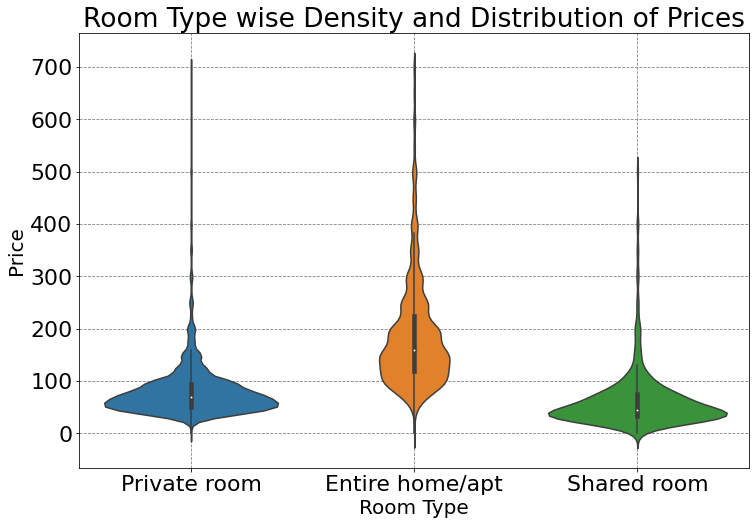

In [84]:
fig, ax= plt.subplots(figsize=(12,8))
price_dist_type_viz = sns.violinplot(x="room_type", y="price", data=data_df[data_df['price'] <= 700], ax=ax)
price_dist_type_viz.set_title('Room Type wise Density and Distribution of Prices')
price_dist_type_viz.set_ylabel('Price', fontsize=20)
price_dist_type_viz.set_xlabel('Room Type', fontsize=20)
price_dist_type_viz.set_axisbelow(True)
price_dist_type_viz.grid(color='gray', linestyle='dashed')
# plt.savefig("room_type_price_density_plot.pdf", format="pdf", bbox_inches="tight")

In [87]:
import functools
import nltk
import wordcloud
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

(-0.5, 1919.5, 1079.5, -0.5)

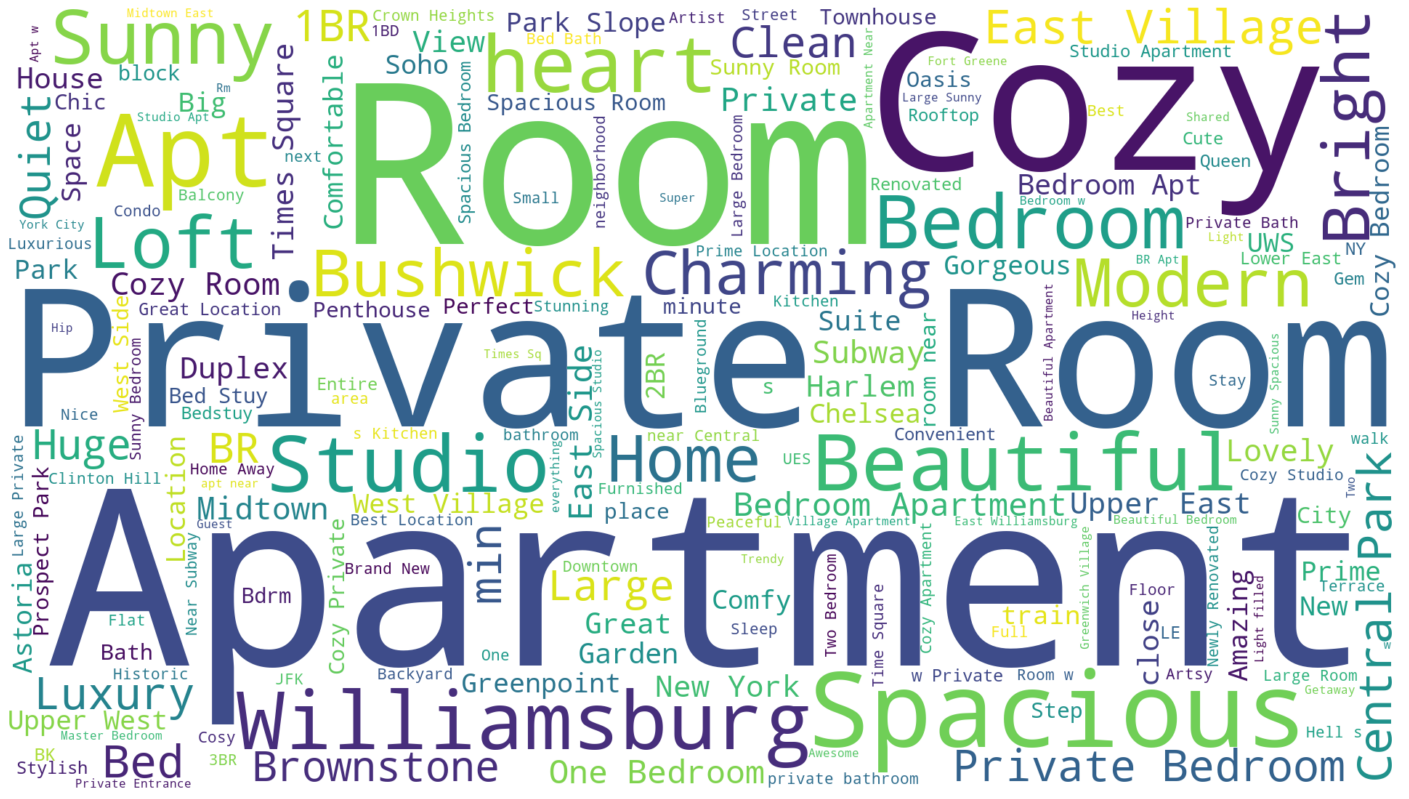

In [88]:
fig, ax = plt.subplots(figsize=(25,15))
text = functools.reduce(lambda a,b: a + " " + str(b), data_df.sample(frac=0.3)['name'])
locations = set(['manhattan', 'queen', 'brooklyn', 'nyc'])
text = ' '.join([w for w in nltk.word_tokenize(text) if w.lower() not in locations])

wc = wordcloud.WordCloud(background_color='white',
                          width=1920,
                          height=1080).generate(text)
ax.imshow(wc, interpolation='bilinear')
plt.axis("off")
# plt.savefig("listing_names_wordcloud.pdf", format="pdf", bbox_inches="tight")

In [91]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [95]:
def filter_top_ngrams(documents, ngram_range=(1,1), unwanted_words=set(), min_occurrences=1):

    remove_words = set(stopwords.words('english')).union(unwanted_words)
    vec = CountVectorizer(stop_words = remove_words, ngram_range=ngram_range)
    sum_words = vec.fit_transform(documents).sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    if min_occurrences > 1:
        words_freq = list(filter(lambda x: x[1] >= min_occurrences, words_freq))
    return words_freq

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Most common n-grams of the 200 cheapest rooms')

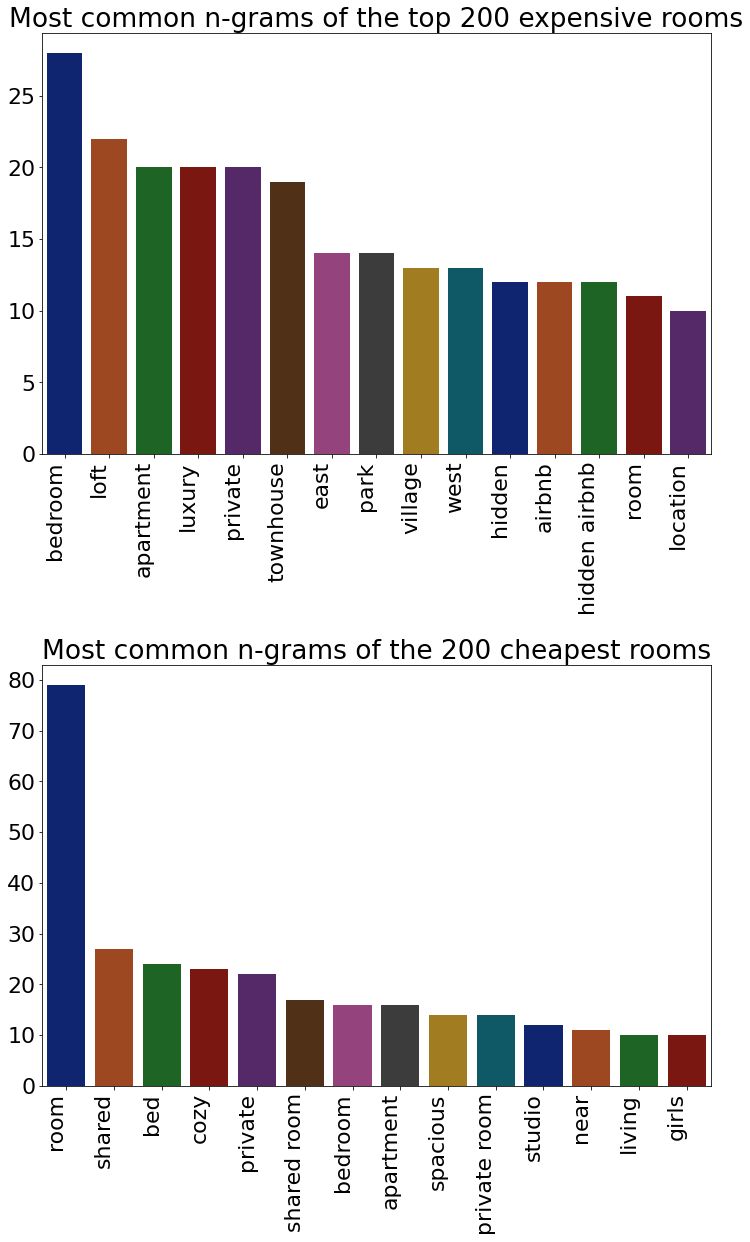

In [96]:
top_ngrams = filter_top_ngrams(data_df.sort_values('reviews_per_month', ascending=False)['name'].iloc[:200], ngram_range=(1,2), unwanted_words=locations, min_occurrences=10)
fig, ax= plt.subplots(2,1,figsize=(15,20))
fig.tight_layout(pad=8.0)


top_ngrams = filter_top_ngrams(data_df.sort_values('price', ascending=False)['name'].iloc[:200], ngram_range=(1,2), unwanted_words=locations, min_occurrences=10)
sns.barplot([x[0] for x in top_ngrams], [x[1] for x in top_ngrams], ax=ax[0],  palette="dark")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, ha="right")
ax[0].set_title('Most common n-grams of the top 200 expensive rooms')


top_ngrams = filter_top_ngrams(data_df.sort_values('price', ascending=True)['name'].iloc[:200], ngram_range=(1,2), unwanted_words=locations, min_occurrences=10)
sns.barplot([x[0] for x in top_ngrams], [x[1] for x in top_ngrams], ax=ax[1],  palette="dark")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha="right")
ax[1].set_title('Most common n-grams of the 200 cheapest rooms')

# plt.savefig("most_common_n_grams.pdf", format="pdf", bbox_inches="tight")